## CNN Models

**Objective**:

To develop and train CNN with CIFAR10 dataset.CIFAR10 dataset is a collection of images of 10 different animals.

Total Images: 60000 X 32 X 32 X 3 with 10 animal classes
*   Train Images: 50000
*   Test Images:10000

Here, we will build different CNN models and validate them.



In [1]:
#Import Libraries
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [2]:
#Load Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
print(y_train[150])
print(y_train[150])

[3]
[3]


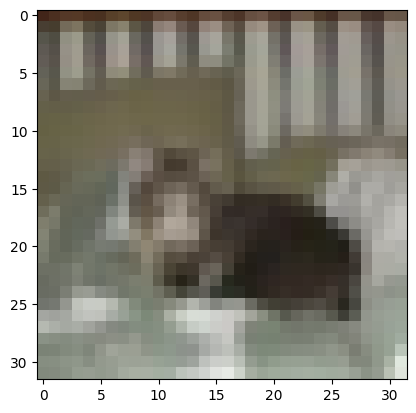

In [19]:
plt.imshow(x_train[150])
plt.show()

In [4]:
# Reshape and normalize
x_train = x_train.reshape(-1, 32, 32, 3).astype('float32') / 255
x_test  = x_test.reshape(-1, 32, 32, 3).astype('float32') / 255
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

### Model1

In [5]:
# Build CNN model
model_1 = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(32, 32, 3)),
    layers.LeakyReLU(alpha=0.1),

    layers.Conv2D(filters=32, kernel_size=(3, 3)),
    layers.LeakyReLU(alpha=0.1),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(), # Convert 2D array to 1D array input

    # Here comes the ANN layers
    layers.Dense(256),    # ANN Hidden/Dense layer with 256 neurons
    layers.LeakyReLU(alpha=0.1),

    layers.Dense(10, activation='softmax')  # 10 classes for Animals

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [6]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,613,546 (6.16 MB)

 Trainable params: 1,613,546 (6.16 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# from re import VERBOSE
# compile model
model_1.compile(optimizer='adam', #the optimizer is the algorithm that adjusts the weights and biases of the network during training so that the model’s predictions get closer to the actual target values.
                loss='categorical_crossentropy', #method used for loss calculation
                metrics=['accuracy'] #accuracy metrics is used to send the feedback back
                )

# build model
history_1 = model_1.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    shuffle=True,
    verbose=2,
    validation_split=0.1,             # <- This tells Keras to split part of x_train/y_train for validation
    validation_data=(x_test, y_test)  # <- This also provides explicit validation data
)


Epoch 1/10
1563/1563 - 12s - 8ms/step - accuracy: 0.5587 - loss: 1.2432 - val_accuracy: 0.6332 - val_loss: 1.0483
Epoch 2/10
1563/1563 - 15s - 10ms/step - accuracy: 0.6965 - loss: 0.8748 - val_accuracy: 0.6687 - val_loss: 0.9519
Epoch 3/10
1563/1563 - 10s - 6ms/step - accuracy: 0.7713 - loss: 0.6585 - val_accuracy: 0.6746 - val_loss: 0.9554
Epoch 4/10
1563/1563 - 10s - 7ms/step - accuracy: 0.8421 - loss: 0.4556 - val_accuracy: 0.6897 - val_loss: 0.9967
Epoch 5/10
1563/1563 - 6s - 4ms/step - accuracy: 0.9017 - loss: 0.2868 - val_accuracy: 0.6799 - val_loss: 1.1746
Epoch 6/10
1563/1563 - 11s - 7ms/step - accuracy: 0.9406 - loss: 0.1748 - val_accuracy: 0.6830 - val_loss: 1.4392
Epoch 7/10
1563/1563 - 8s - 5ms/step - accuracy: 0.9591 - loss: 0.1211 - val_accuracy: 0.6804 - val_loss: 1.5622
Epoch 8/10
1563/1563 - 10s - 7ms/step - accuracy: 0.9632 - loss: 0.1053 - val_accuracy: 0.6818 - val_loss: 1.6874
Epoch 9/10
1563/1563 - 6s - 4ms/step - accuracy: 0.9674 - loss: 0.0921 - val_accuracy: 0.

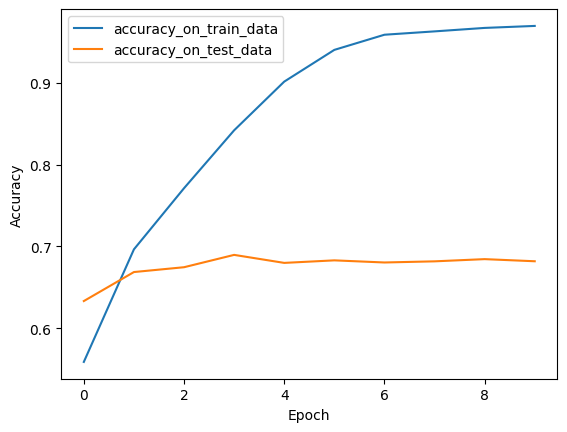

In [8]:
#Evaluate Model ()
plt.plot(history_1.history['accuracy'],label='accuracy_on_train_data')
plt.plot(history_1.history['val_accuracy'],label='accuracy_on_test_data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

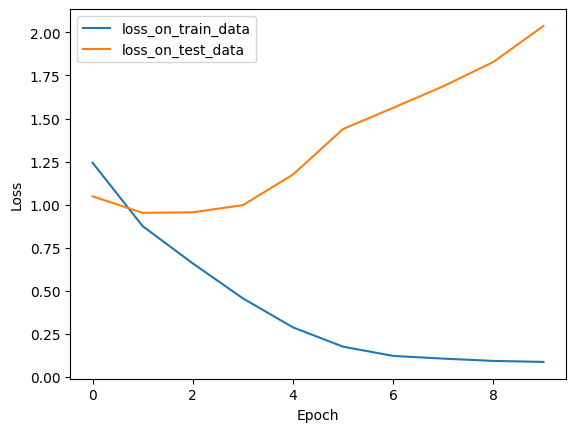

In [9]:
#Evaluate Model
plt.plot(history_1.history['loss'],label='loss_on_train_data')
plt.plot(history_1.history['val_loss'],label='loss_on_test_data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Conclusion
Accuracy is high on train data, but relatively very low on test data. It means, the model is overfitted.

### Model 2 (Optimized)
Added MaxPooling in layer1

In [10]:
# Build CNN model
model_2 = models.Sequential([
    # layer1
    layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(32, 32, 3)),
    layers.LeakyReLU(alpha=0.1),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # layer2
    layers.Conv2D(filters=32, kernel_size=(3, 3)),
    layers.LeakyReLU(alpha=0.1),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(), # Convert 2D array to 1D array input

    # Here comes the ANN layers / Fully connected layer
    layers.Dense(256),    # ANN Hidden/Dense layer with 256 neurons
    layers.LeakyReLU(alpha=0.1),

    layers.Dense(10, activation='softmax')  # 10 classes for Animals

])

In [11]:
# compile model
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# build model
history_2 = model_2.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    shuffle=True,
    verbose=2,
    validation_split=0.1,             # <- This tells Keras to split part of x_train/y_train for validation
    validation_data=(x_test, y_test)  # <- This also provides explicit validation data
)

Epoch 1/10
1563/1563 - 11s - 7ms/step - accuracy: 0.4998 - loss: 1.4050 - val_accuracy: 0.5959 - val_loss: 1.1508
Epoch 2/10
1563/1563 - 6s - 4ms/step - accuracy: 0.6286 - loss: 1.0594 - val_accuracy: 0.6297 - val_loss: 1.0631
Epoch 3/10
1563/1563 - 10s - 6ms/step - accuracy: 0.6836 - loss: 0.9027 - val_accuracy: 0.6648 - val_loss: 0.9632
Epoch 4/10
1563/1563 - 6s - 4ms/step - accuracy: 0.7309 - loss: 0.7792 - val_accuracy: 0.6868 - val_loss: 0.9096
Epoch 5/10
1563/1563 - 5s - 3ms/step - accuracy: 0.7659 - loss: 0.6756 - val_accuracy: 0.6836 - val_loss: 0.9461
Epoch 6/10
1563/1563 - 10s - 7ms/step - accuracy: 0.7966 - loss: 0.5802 - val_accuracy: 0.7004 - val_loss: 0.9339
Epoch 7/10
1563/1563 - 10s - 7ms/step - accuracy: 0.8311 - loss: 0.4858 - val_accuracy: 0.7067 - val_loss: 0.9508
Epoch 8/10
1563/1563 - 10s - 7ms/step - accuracy: 0.8570 - loss: 0.4059 - val_accuracy: 0.7007 - val_loss: 1.0180
Epoch 9/10
1563/1563 - 11s - 7ms/step - accuracy: 0.8855 - loss: 0.3297 - val_accuracy: 0.7

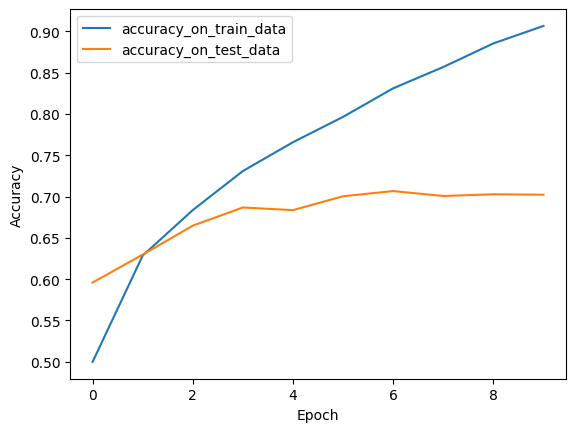

In [12]:
#Evaluate Model ()
plt.plot(history_2.history['accuracy'],label='accuracy_on_train_data')
plt.plot(history_2.history['val_accuracy'],label='accuracy_on_test_data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

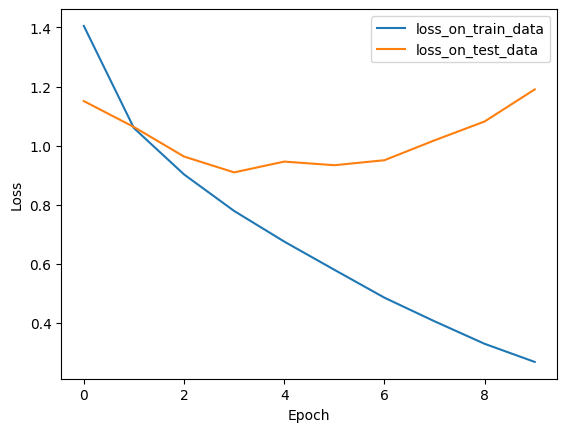

In [13]:
#Evaluate Model
plt.plot(history_2.history['loss'],label='loss_on_train_data')
plt.plot(history_2.history['val_loss'],label='loss_on_test_data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Conclusion
The accuracy improved on tested data, but it is still very less compared to the train data. Hence, it is still an overfitted model and needs further optimization.

### Model 3 (Optimization with Dropout Layer)

In [15]:
# Build CNN model
model_3 = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(32, 32, 3)),
    layers.LeakyReLU(alpha=0.1),
    # layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),  #First dropout

    layers.Conv2D(filters=32, kernel_size=(3, 3)),
    layers.LeakyReLU(alpha=0.1),
    # layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),  #Second dropout
    layers.MaxPooling2D(pool_size=(2, 2)),



    layers.Flatten(), # Convert 2D array to 1D array input

    # Here comes the ANN layers
    layers.Dense(256),    # ANN Hidden/Dense layer with 256 neurons
    layers.LeakyReLU(alpha=0.1),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')  # 10 classes for Animals

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [16]:
# compile model
model_3.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [17]:
# build model
history_3 = model_3.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    shuffle=True,
    verbose=2,
    validation_split=0.1,             # <- This tells Keras to split part of x_train/y_train for validation
    validation_data=(x_test, y_test)  # <- This also provides explicit validation data
)

Epoch 1/10
1563/1563 - 14s - 9ms/step - accuracy: 0.4701 - loss: 1.4778 - val_accuracy: 0.5102 - val_loss: 1.4518
Epoch 2/10
1563/1563 - 7s - 4ms/step - accuracy: 0.6028 - loss: 1.1315 - val_accuracy: 0.6054 - val_loss: 1.1385
Epoch 3/10
1563/1563 - 6s - 4ms/step - accuracy: 0.6542 - loss: 0.9915 - val_accuracy: 0.6378 - val_loss: 1.0758
Epoch 4/10
1563/1563 - 7s - 4ms/step - accuracy: 0.6858 - loss: 0.8990 - val_accuracy: 0.6498 - val_loss: 1.0556
Epoch 5/10
1563/1563 - 10s - 7ms/step - accuracy: 0.7110 - loss: 0.8278 - val_accuracy: 0.6576 - val_loss: 1.0308
Epoch 6/10
1563/1563 - 6s - 4ms/step - accuracy: 0.7304 - loss: 0.7707 - val_accuracy: 0.6576 - val_loss: 1.0475
Epoch 7/10
1563/1563 - 6s - 4ms/step - accuracy: 0.7484 - loss: 0.7201 - val_accuracy: 0.6634 - val_loss: 1.0167
Epoch 8/10
1563/1563 - 6s - 4ms/step - accuracy: 0.7622 - loss: 0.6737 - val_accuracy: 0.6414 - val_loss: 1.1486
Epoch 9/10
1563/1563 - 10s - 6ms/step - accuracy: 0.7759 - loss: 0.6363 - val_accuracy: 0.6395

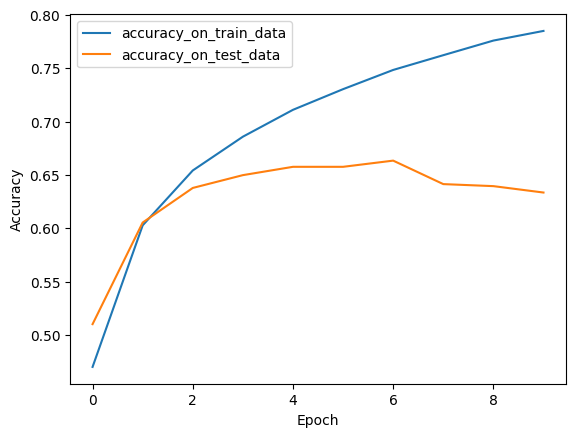

In [18]:
#Evaluate Model (Trainig Data)
plt.plot(history_3.history['accuracy'],label='accuracy_on_train_data')
plt.plot(history_3.history['val_accuracy'],label='accuracy_on_test_data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

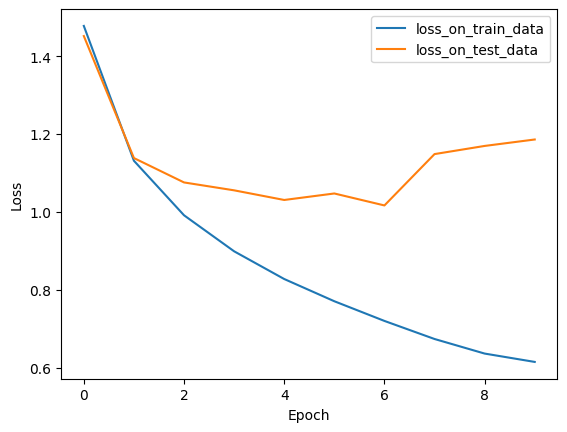

In [19]:
#Evaluate Model (Test Data)
plt.plot(history_3.history['loss'],label='loss_on_train_data')
plt.plot(history_3.history['val_loss'],label='loss_on_test_data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Conclusion
The accuracy on both train and test data are very close. But the overall accuracy is low (nealy 77%). It means the model is underfitted and needs further improvement.

### Model 4 (Optimized with doubled convolutional layers)

In [44]:
# Build CNN model
model_4 = models.Sequential([
    # first convolutional layer
    layers.Conv2D(filters=16, kernel_size=(5, 5), input_shape=(32, 32, 3)),
    layers.LeakyReLU(alpha=0.1),
    # layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),  #First dropout

    # second convolutional layer
    layers.Conv2D(filters=32, kernel_size=(5, 5)),
    layers.LeakyReLU(alpha=0.1),
    # layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),  #Second dropout
    layers.MaxPooling2D(pool_size=(2, 2)),

    # third convolutional layer
    layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(32, 32, 3)),
    layers.LeakyReLU(alpha=0.1),
    # layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),  #3rd dropout

    # fourth convolutional layer
    layers.Conv2D(filters=32, kernel_size=(3, 3)),
    layers.LeakyReLU(alpha=0.1),
    # layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),  #fourth dropout
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(), # Convert 2D array to 1D array input

    # Here comes the ANN layers
    layers.Dense(256),    # ANN Hidden/Dense layer with 256 neurons
    layers.LeakyReLU(alpha=0.1),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')  # 10 classes for Animals

])

In [45]:
# compile model
model_4.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.005), #slow down the learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# build model
history_4 = model_4.fit(
    x_train,
    y_train,
    epochs=15,
    batch_size=32,
    shuffle=True,
    verbose=2,
    validation_split=0.1,             # <- This tells Keras to split part of x_train/y_train for validation
    validation_data=(x_test, y_test)  # <- This also provides explicit validation data
)

Epoch 1/15
1563/1563 - 20s - 13ms/step - accuracy: 0.3368 - loss: 1.7864 - val_accuracy: 0.3968 - val_loss: 1.7044
Epoch 2/15
1563/1563 - 8s - 5ms/step - accuracy: 0.4614 - loss: 1.4818 - val_accuracy: 0.4678 - val_loss: 1.5202
Epoch 3/15
1563/1563 - 7s - 4ms/step - accuracy: 0.5108 - loss: 1.3581 - val_accuracy: 0.5001 - val_loss: 1.4802
Epoch 4/15
1563/1563 - 6s - 4ms/step - accuracy: 0.5356 - loss: 1.2924 - val_accuracy: 0.4683 - val_loss: 1.5216
Epoch 5/15
1563/1563 - 10s - 6ms/step - accuracy: 0.5574 - loss: 1.2405 - val_accuracy: 0.5301 - val_loss: 1.4092
Epoch 6/15
1563/1563 - 6s - 4ms/step - accuracy: 0.5711 - loss: 1.1990 - val_accuracy: 0.5649 - val_loss: 1.2533
Epoch 7/15
1563/1563 - 6s - 4ms/step - accuracy: 0.5890 - loss: 1.1600 - val_accuracy: 0.5785 - val_loss: 1.2591
Epoch 8/15
1563/1563 - 7s - 5ms/step - accuracy: 0.5987 - loss: 1.1317 - val_accuracy: 0.5440 - val_loss: 1.4792
Epoch 9/15
1563/1563 - 9s - 6ms/step - accuracy: 0.6060 - loss: 1.1092 - val_accuracy: 0.5022

In [37]:
model_4.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 28, 28, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_39 (LeakyReLU)      │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 24, 24, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_40 (LeakyReLU)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 10, 10, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_41 (LeakyReLU)      │ (None, 10, 10, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 10, 10, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 8, 8, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_42 (LeakyReLU)      │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_43 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 471,632 (1.80 MB)

 Trainable params: 157,210 (614.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 314,422 (1.20 MB)

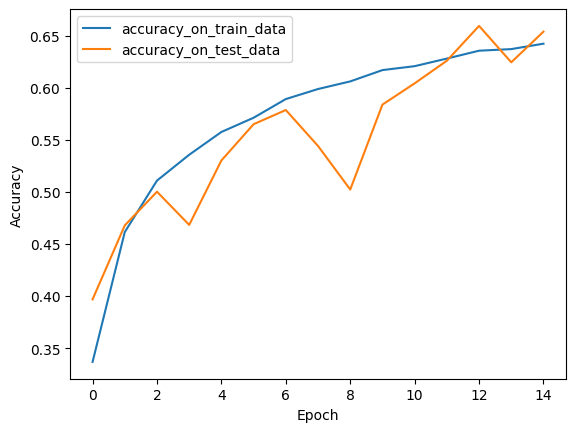

In [47]:
#Evaluate Model (Trainig Data)
plt.plot(history_4.history['accuracy'],label='accuracy_on_train_data')
plt.plot(history_4.history['val_accuracy'],label='accuracy_on_test_data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

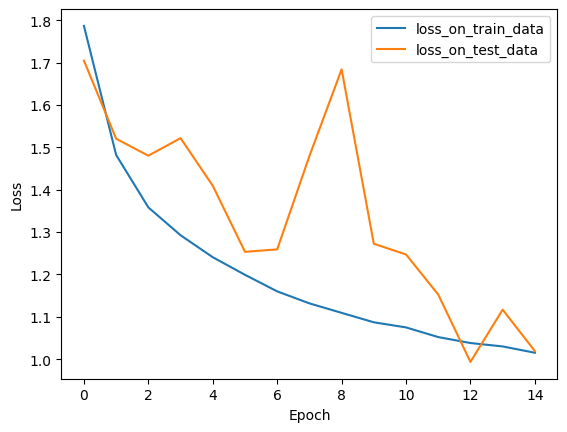

In [48]:
#Evaluate Model (Test Data)
plt.plot(history_4.history['loss'],label='loss_on_train_data')
plt.plot(history_4.history['val_loss'],label='loss_on_test_data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Conclusion
With multiple convolution layers, we are not seeing accuracy improve. But, the accuracy with both train & test data is almost which is a good thing. We will have to live with it.

In the next section, we will learn other techniques to improve it further.

### Prediction using Model4

In [46]:
y_pred = model_4.predict(x_test)

y_pred=np.argmax(y_pred,axis=1)
print(y_pred)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[3 8 8 ... 5 4 7]


[[483  11  99  25  70   7  20  19 242  24]
 [ 11 754   9  22  21  11  29  13  40  90]
 [ 34   2 504  97 124  57 113  32  33   4]
 [  6   2  71 556  81 135  94  31  18   6]
 [  3   0  68  73 656  19  90  75  16   0]
 [  3   0  62 290  61 481  38  50  11   4]
 [  2   1  35  74  42   7 828   6   4   1]
 [  4   0  54  58 107  66  16 690   1   4]
 [ 21  14  14  24  10   8  12   5 872  20]
 [ 19  55  14  38  29  12  21  39  60 713]]
              precision    recall  f1-score   support

           0       0.82      0.48      0.61      1000
           1       0.90      0.75      0.82      1000
           2       0.54      0.50      0.52      1000
           3       0.44      0.56      0.49      1000
           4       0.55      0.66      0.60      1000
           5       0.60      0.48      0.53      1000
           6       0.66      0.83      0.73      1000
           7       0.72      0.69      0.70      1000
           8       0.67      0.87      0.76      1000
           9       0.82     

Text(95.72222222222221, 0.5, 'Truth')

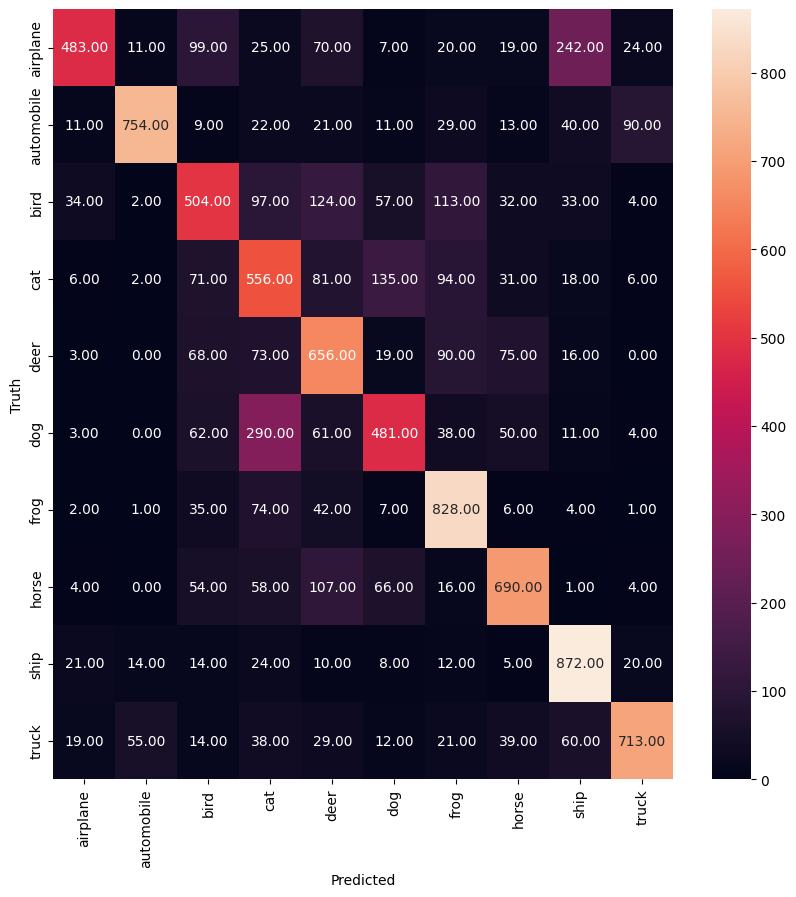

In [51]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

cm=confusion_matrix(y_test.argmax(axis=1),y_pred)
print(cm)
print(classification_report(y_test.argmax(axis=1),y_pred))

plt.figure(figsize=(10,10))
import seaborn as sns
cifar_classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=cifar_classes,yticklabels=cifar_classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Image Data Generator
In the above examples, we learned using existing image numpy arrays.

Here, we will see how to convert the actual raw images into numpy array so that we can process them.

In [1]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import requests
import os

#Source URL
drop_box_url="https://www.dropbox.com/s/h16vq9rab1itifs/CatDog.zip?dl=1"

#Download Zip file
zip_path='CatDog.zip'
with open(zip_path,'wb') as f:
  response=requests.get(drop_box_url)
  f.write(response.content)

#Unzip file
with zipfile.ZipFile(zip_path,'r') as f:
  f.extractall('image_data')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1.0/255,validation_split=0.2)

#Load training data
train_generator=datagen.flow_from_directory(
    directory='image_data',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator=datagen.flow_from_directory(
    directory='image_data',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
(32, 150, 150, 3)
(32,)


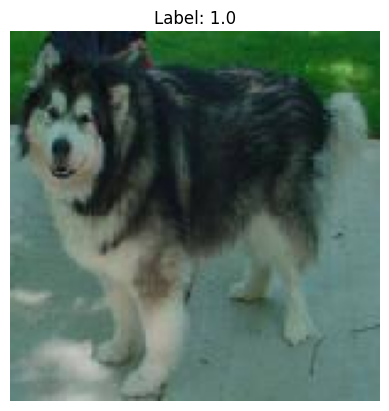

In [14]:
# show the shape of the data
print(type(train_generator))

# Get one batch
x_batch, y_batch = next(train_generator)
print(x_batch.shape)  # Should print (32, 150, 150, 3)
print(y_batch.shape)  # Should print (32,)

# Take the first image in the batch
image = x_batch[0]
label = y_batch[0]

# Plot it
import matplotlib.pyplot as plt
plt.imshow(image)  # Already scaled to 0-1 due to rescale=1.0/255
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

# Transfer Learning

**Transfer learning** is a machine learning technique where a model developed for one task is reused (either entirely or partially) as the starting point for a model on a different but related task.

Instead of training from scratch (which needs huge data and computation), we **transfer** the knowledge learned in a pre-trained model to a new problem.

---

## Why It Works
Deep learning models (especially CNNs for images, transformers for text) learn *general* features in their early layers (edges, textures, basic shapes in images; grammar patterns in text), and *task-specific* features in later layers.  
By reusing these early/general features, we speed up learning and need less data.

---

## Types of Transfer Learning

### 1. Feature Extraction
- **Freeze** the pre-trained model’s layers (no training on them).
- Use it to extract features from new data.
- Add new layers (classifier or regressor) on top for your target task.
- **Example:** Use `VGG16` trained on ImageNet, freeze it, and add a dense layer to classify medical X-ray images.

---

### 2. Fine-Tuning
- Start with a pre-trained model.
- **Unfreeze** some of the later layers (or all layers) and train them **with a low learning rate**.
- Allows the model to adapt to the new dataset’s features.
- Often done **after** feature extraction to avoid destroying learned weights early.

---

# Feature Extraction vs Fine-Tuning

| Aspect | Feature Extraction | Fine-Tuning |
|--------|-------------------|-------------|
| **Definition** | Use a pre-trained model as a fixed feature extractor; only train new layers added on top. | Start with a pre-trained model and retrain some or all of its layers on the new dataset. |
| **Layers Trained** | Only the newly added layers (classifier head). | Newly added layers **plus** selected existing layers (often the top layers). |
| **Weights of Pre-trained Model** | Frozen (unchanged). | Partially or fully updated during training. |
| **Training Time** | Faster, since most layers are frozen. | Slower, since more layers are updated. |
| **Risk of Overfitting** | Lower (fewer parameters trained). | Higher (more parameters trained), especially with small datasets. |
| **When to Use** | When dataset is small and similar to the source dataset. | When dataset is moderately sized and slightly different from the source dataset. |
| **Learning Rate** | Can be relatively higher for new layers. | Should be small to avoid destroying pre-trained weights. |
| **Example Use Case** | Using ImageNet-trained CNN to classify medical X-rays with very few samples. | Adapting an ImageNet-trained CNN to classify aerial drone imagery with new visual patterns. |


https://www.v7labs.com/blog/transfer-learning-guide

### CNN Model (using pre-trained model)

Build a MODEL using pre-trained model. We will use the same CIFAR10 dataset. We will use **VGG16** pre-trained CNN model from ImageNet.

**Pre-trained models available in Keras.io.**
https://keras.io/api/applications/

#### Imagenet
https://image-net.org/about.php

ImageNet runs competition every year for organization to come and present their CNN models. **VGG16** is from the year 2014. It has its pre-defined images that they provide to the teams to use to build the models.

#### VGG16
![VGG16](https://viso.ai/wp-content/uploads/2021/10/vgg-neural-network-architecture.png)

In our model, we will make use of first 3 blocks from VGG16 and transfer the model from it. And then add our own layers.

In [21]:
# Build CNN Model 5 (using transfer learning)
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.applications import VGG16



In [22]:
vgg_model=VGG16(weights='imagenet', # its a multi-modal model. Hence, must specify which weights to use. weights from imagenet image training.
                include_top=False,  # Exclude the top layer (fully-connected/hidden layer + output layer) from the pre-defined model.
                input_shape=(32,32,3),
                pooling='max' # Specify what type of pooling to use.
                )


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [24]:
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

# 1. Load VGG16 without top layers
vgg_model = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(32, 32, 3)
)

# 2. Create a new model up to block3_pool
transfer_layer = models.Model(
    inputs=vgg_model.input,
    outputs=vgg_model.get_layer('block3_pool').output
)

# 3. Freeze the VGG layers
transfer_layer.trainable = False

# 4. Build the Sequential model
model_5 = models.Sequential([
    transfer_layer,  # VGG16 up to block3_pool
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')    # Multi-class
])

# 5. Compile the model
model_5.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # use binary_crossentropy for binary
    metrics=['accuracy']
)

In [44]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_6 (Functional)       │ (None, 4, 4, 256)      │     1,735,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,819,018 (10.75 MB)

 Trainable params: 1,083,274 (4.13 MB)

 Non-trainable params: 1,735,744 (6.62 MB)

In [45]:
model_5.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0005),metrics=['accuracy'])

In [46]:
history_5 = model_5.fit(x_train,y_train,epochs=15,batch_size=128,validation_split=0.1,shuffle=True,verbose=2)

Epoch 1/15
352/352 - 11s - 30ms/step - accuracy: 0.4454 - loss: 1.6132 - val_accuracy: 0.6532 - val_loss: 1.0932
Epoch 2/15
352/352 - 5s - 14ms/step - accuracy: 0.5959 - loss: 1.1905 - val_accuracy: 0.6876 - val_loss: 0.9558
Epoch 3/15
352/352 - 5s - 15ms/step - accuracy: 0.6455 - loss: 1.0479 - val_accuracy: 0.7056 - val_loss: 0.8623
Epoch 4/15
352/352 - 10s - 29ms/step - accuracy: 0.6770 - loss: 0.9578 - val_accuracy: 0.7376 - val_loss: 0.7940
Epoch 5/15
352/352 - 5s - 14ms/step - accuracy: 0.7012 - loss: 0.8865 - val_accuracy: 0.7492 - val_loss: 0.7520
Epoch 6/15
352/352 - 5s - 14ms/step - accuracy: 0.7227 - loss: 0.8236 - val_accuracy: 0.7572 - val_loss: 0.7288
Epoch 7/15
352/352 - 5s - 15ms/step - accuracy: 0.7380 - loss: 0.7759 - val_accuracy: 0.7696 - val_loss: 0.6755
Epoch 8/15
352/352 - 10s - 29ms/step - accuracy: 0.7568 - loss: 0.7248 - val_accuracy: 0.7718 - val_loss: 0.6796
Epoch 9/15
352/352 - 10s - 29ms/step - accuracy: 0.7664 - loss: 0.6955 - val_accuracy: 0.7734 - val_l

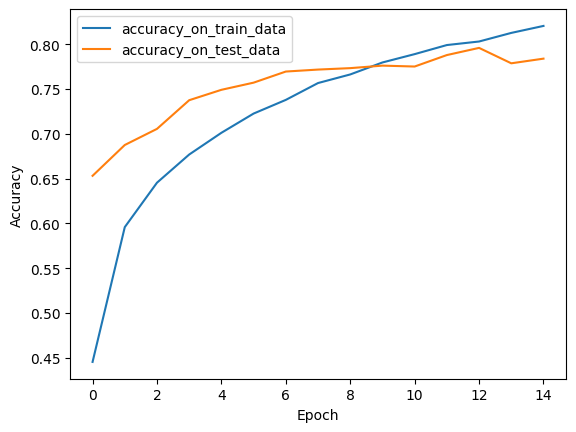

In [47]:
#Evaluate Model (Trainig Data)
plt.plot(history_5.history['accuracy'],label='accuracy_on_train_data')
plt.plot(history_5.history['val_accuracy'],label='accuracy_on_test_data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

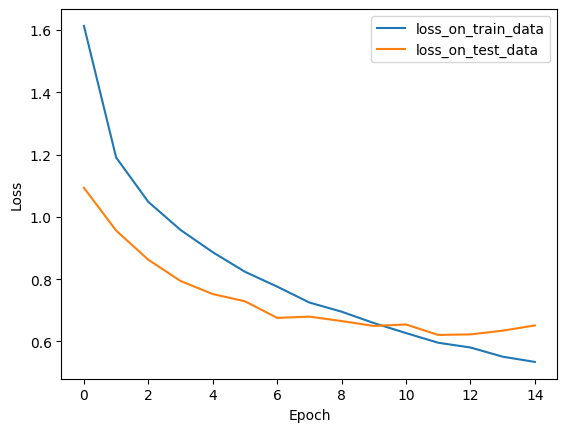

In [48]:
#Evaluate Model (Test Data)
plt.plot(history_5.history['loss'],label='loss_on_train_data')
plt.plot(history_5.history['val_loss'],label='loss_on_test_data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()